## Loan Repayment Prediction Using Ensemble Learning Methods



### Objective:
###### Predicts whether the bank should approves the loan of an applicant based on his profit using Ensemble Learning Methods.

### Importing Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotliab inline
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StartifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.preprocessing import StandetdScaler
from sklearn.model_selection import GridSearchCV  
from  sklearn.metrics  import  accuracy_score , precision_score , recall_score,confusion_matrix,classification_report


UsageError: Line magic function `%matplotliab` not found.


#### Reading a file

In [48]:
df=pd.read_csv('loan_data.csv')

In [49]:
df.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [50]:
df.shape

(9578, 14)

df.info()

In [51]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [52]:
#summary
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### checking for null values

In [53]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [54]:
# Now lets solve the problem with Purpose Attribute

#it is used to count the number of occurrences of each unique value in the purpose column 
# of the DataFrame df.

df.purpose.value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

#### label encoding

In [55]:
from sklearn.preprocessing import LabelEncoder  # ✅ Import LabelEncoder
df['purpose']=LabelEncoder().fit_transform(df['purpose'])

In [56]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### DataVisualization

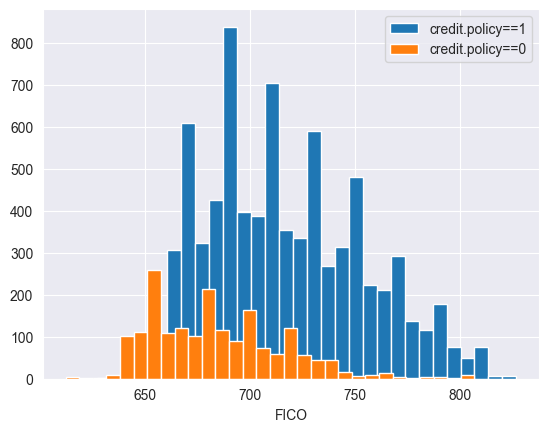

In [57]:
sns.set_style('darkgrid')
plt.hist(df['fico'].loc[df['credit.policy']==1],bins=30,label='credit.policy==1')
plt.hist(df['fico'].loc[df['credit.policy']==0],bins=30,label='credit.policy==0')
plt.legend()
plt.xlabel('FICO')
plt.show()

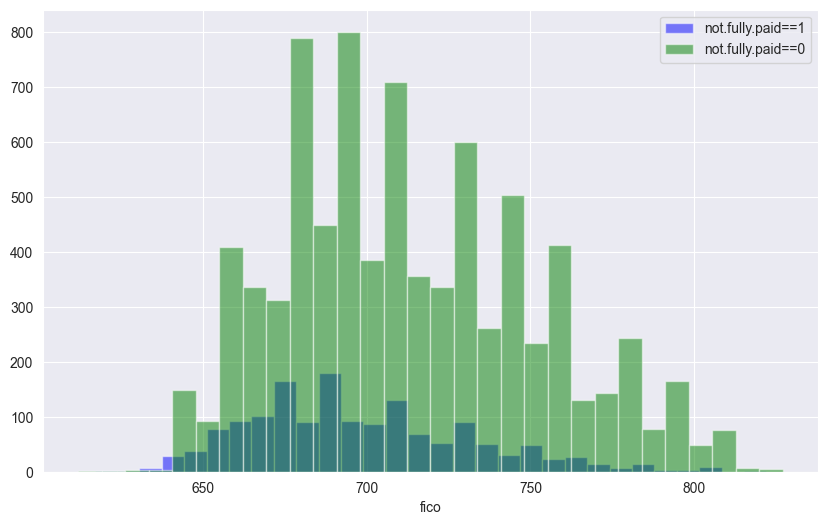

In [58]:
plt.figure(figsize=(10,6))
plt.hist(df[df['not.fully.paid']==1]['fico'],bins=30,alpha=0.5,color='blue',label='not.fully.paid==1')
plt.hist(df[df['not.fully.paid']==0]['fico'],bins=30,alpha=0.5,color='green',label='not.fully.paid==0')
plt.legend()
plt.xlabel('fico')
plt.show()




<Axes: xlabel='purpose', ylabel='count'>

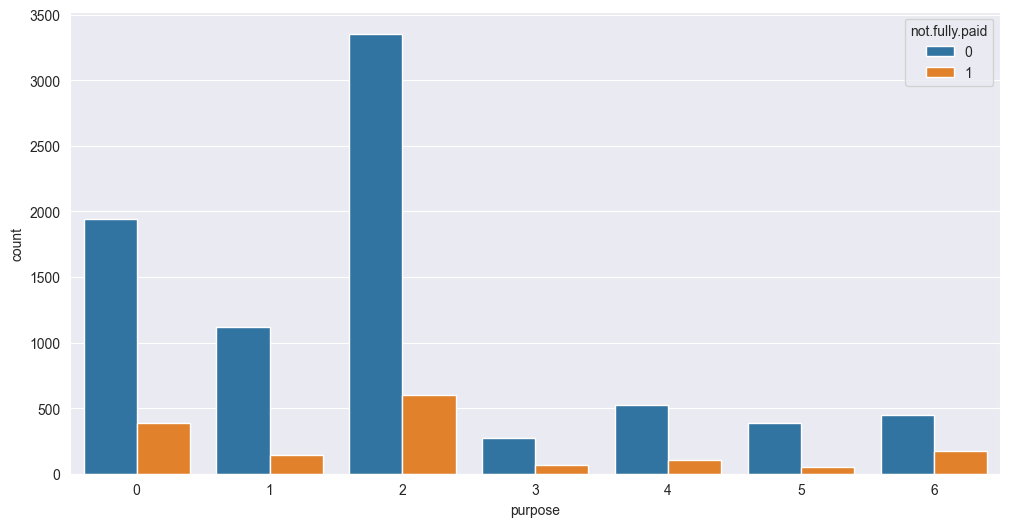

In [59]:
#creating a countplot to see the counts of purpose of loans by not.fully.paid
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='purpose',hue='not.fully.paid')

<Figure size 1500x800 with 0 Axes>

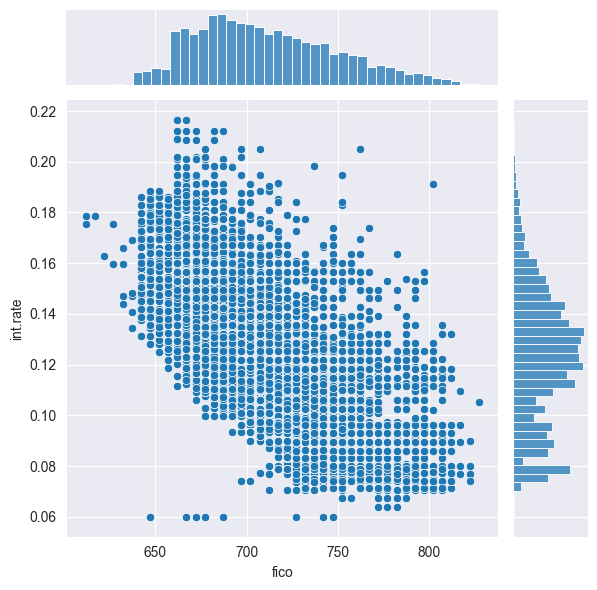

In [60]:
#checking the trend between FICO and the interest rate
plt.figure(figsize=(15,8))
sns.jointplot(data=df,x='fico',y='int.rate')

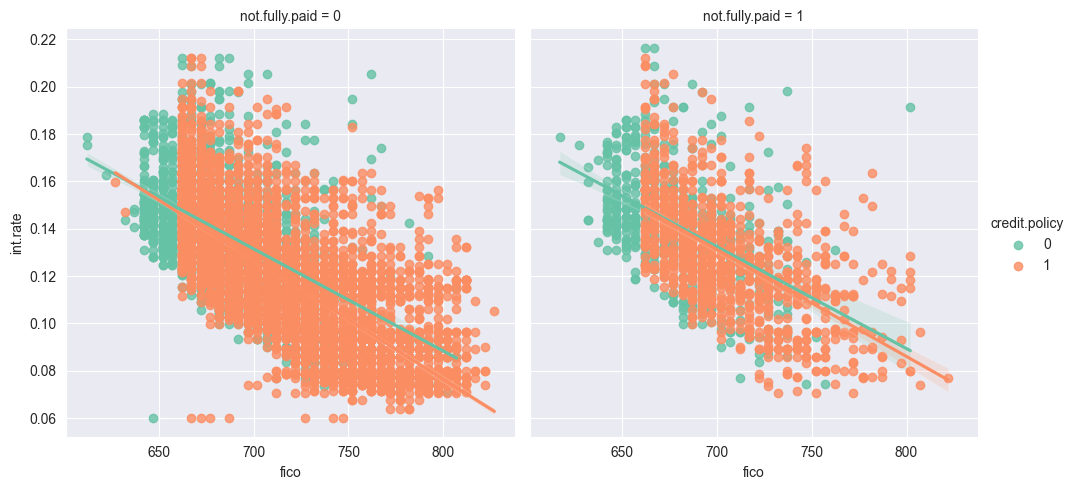

In [61]:
#understanding the relationship between credit.policy and not.fully.paid
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set2')

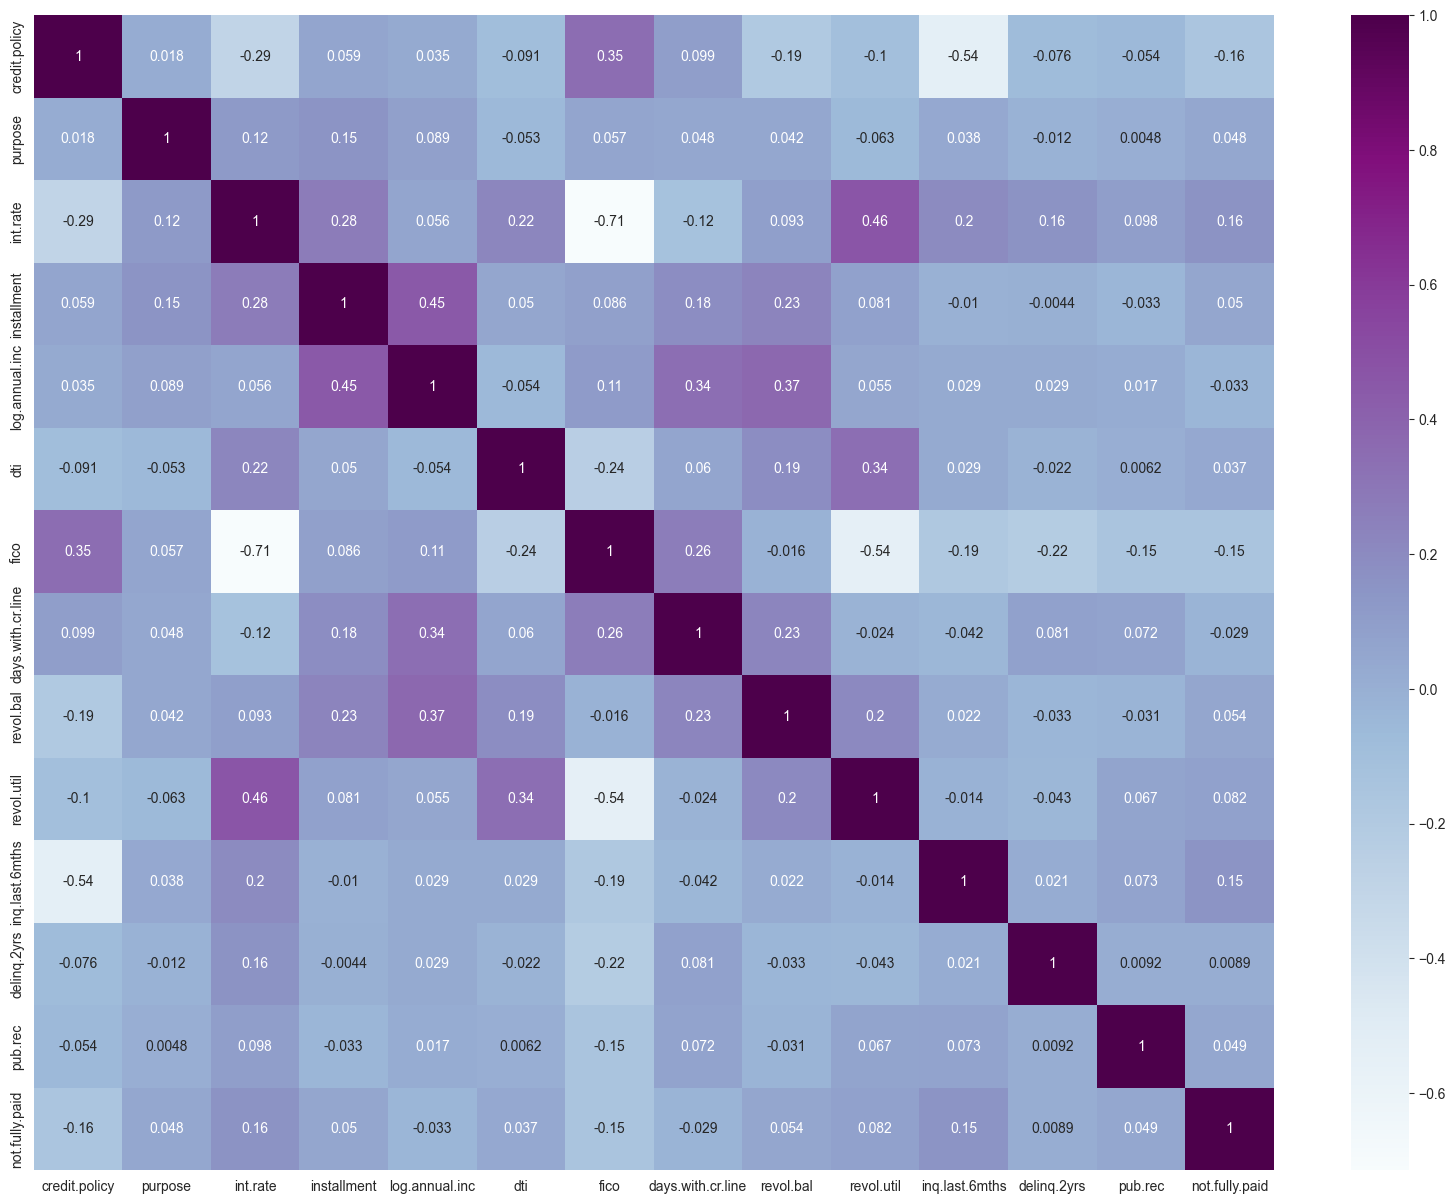

In [62]:
plt.figure(figsize = (20, 15)) 
sns.heatmap(df.corr(), cmap='BuPu', annot=True)
plt.show()

#### train_test_split

In [63]:
#dropping target values
x=df.drop('not.fully.paid',axis=1)
y=df['not.fully.paid']

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=101)

### modelling

In [65]:
from sklearn.tree import DecisionTreeClassifier


In [66]:

from sklearn.model_selection import GridSearchCV, KFold  # Import KFold

# Define the model
dt_clf = DecisionTreeClassifier()

# Define hyperparameter grid
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 20]}

#  Create an instance of KFold before using it
kFold = KFold(n_splits=5)

# Perform Grid Search
grid_search = GridSearchCV(dt_clf, param_grid, scoring='recall_weighted', cv=kFold, return_train_score=True)

# Fit the model
grid_search.fit(x_train, y_train)  

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15,
                                       20]},
             return_train_score=True, scoring='recall_weighted')

In [67]:
grid_search.best_params_

{'max_depth': 2}

In [68]:
dt_clf=DecisionTreeClassifier(max_depth=2)
dt_clf.fit(x_train,y_train)
y_pred_train = dt_clf.predict(x_train)
y_pred_test = dt_clf.predict(x_test)

from sklearn.metrics import accuracy_score  
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  #  Import required metrics

# Calculate Confusion Matrix
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred_test))
print("\n")

# Classification Report
print("<------------------- Classification Report ---------------------->\n")
print(classification_report(y_test, y_pred_test))
print("\n")

# Accuracy Scores
train_accuracy = accuracy_score(y_train, dt_clf.predict(x_train))  #Ensure train_accuracy is calculated
test_accuracy = accuracy_score(y_test, y_pred_test)  #Ensure test_accuracy is calculated

print("<--------------- Accuracy Scores ------------------->\n")
print('Train Accuracy score: ', train_accuracy)
print('Test Accuracy score:', test_accuracy)


Confusion Matrix 
 [[2431    0]
 [ 443    0]]


<------------------- Classification Report ---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



<--------------- Accuracy Scores ------------------->

Train Accuracy score:  0.8374105011933174
Test Accuracy score: 0.8458594293667363


C:\Users\linga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\linga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\linga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

##### We got the **Accuracy of 84.58%** with Decision Tree Classifier

### Bagging with decison tree

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

# Scale features correctly
scaler = StandardScaler()  # Fix typo
X_scaled = scaler.fit_transform(x)  # Use X_scaled instead of overwriting scaler

# Define Bagging Classifier with Decision Tree
bag_dt = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, bootstrap=True)

# Define cross-validation
kf = KFold(n_splits=5)

# Perform cross-validation
score = cross_val_score(estimator=bag_dt, X=X_scaled, y=y, scoring='recall_weighted', cv=kf, n_jobs=-1)

# Print results
print('Mean score:', score.mean())


Mean score: 0.8399385142022382


### AdaBoosting with decision tree

In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # Import missing dependency

adaboost_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.5)
adaboost_clf.fit(x_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(x_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(x_test, y_test)))


Train score: 0.84
Test score: 0.85


#### We got the **Accuracy of 85.0%** AdaBoosting with decision tree

### Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=600)
rf_clf.fit(x_train, y_train)
y_pred_train = rf_clf.predict(x_train)
y_pred_test = rf_clf.predict(x_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [73]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2423    8]
 [ 434    9]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.8462073764787752


#### We got the **Accuracy of 84.7%** with random Forest Classifier

#### Adaboosting with Random forest

In [74]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(estimator = rf_clf, learning_rate = 0.5)
adaboost_clf.fit(x_train, y_train)

y_pred_train = adaboost_clf.predict(x_train)
y_pred_test = adaboost_clf.predict(x_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [75]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2425    6]
 [ 434    9]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.60      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.8469032707028532


#### We got the **Accuracy of 85%** with adaboosting with decision tree

##### while computing different ensemble learning technologies we found that the most of the Bagging and Boostig algorithms are giving similar results with min difference in accuracy.
##### we found that the **best model fot this dataset is AdaBoosting with decision Tree**

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import pickle

# Load the dataset
df = pd.read_csv("loan_data.csv")  

# One-hot encode 'purpose'
df = pd.get_dummies(df, columns=['purpose'], drop_first=False)

# Define features and target
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# Optional: confirm shape
print(f"Feature count after encoding: {X.shape[1]}")  # Should be 19

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Train AdaBoost
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Save model
with open("aboost_clf.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model retrained and saved with 19 features.")


Feature count after encoding: 19
✅ Model retrained and saved with 19 features.
